*name faizan roll no 134*

In [2]:
import pandas as pd
df=pd.read_csv("faizan.csv.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Country          116 non-null    object
 1   2019_Complaints  117 non-null    int64 
 2   2019_Losses      117 non-null    int64 
 3   2020_Complaints  117 non-null    int64 
 4   2020_Losses      117 non-null    int64 
 5   2021_Complaints  117 non-null    int64 
 6   2021_Losses      117 non-null    int64 
 7   2022_Complaints  117 non-null    int64 
 8   2022_Losses      117 non-null    int64 
 9   2023_Complaints  117 non-null    int64 
 10  2023_Losses      117 non-null    int64 
 11  2024_Complaints  117 non-null    int64 
 12  2024_Losses      117 non-null    int64 
dtypes: int64(12), object(1)
memory usage: 12.0+ KB


In [6]:
df = pd.DataFrame(df)

In [7]:
df.head()

,Country,2019_Complaints,2019_Losses,2020_Complaints,2020_Losses,2021_Complaints,2021_Losses,2022_Complaints,2022_Losses,2023_Complaints,2023_Losses,2024_Complaints,2024_Losses
0,PR,655,5929974,1338,7209755,1785,9463928,1594,17211758,1817,21018302,1974,31545772
1,PS,1784,22483591,2890,25423219,3352,48918464,3210,57796003,3378,69292891,3811,66002407
2,PT,1119,13870074,2020,12391290,2102,18205913,1918,30859319,2178,28700418,2209,40192274
3,PY,1913,10967865,2992,13815152,3188,26677869,3768,40114594,3487,33579643,2678,45168957
4,AE,5503,48101706,7390,81178182,10164,131934602,10042,187062157,11034,244238485,12071,280815215


In [8]:
column = list(df.columns)
column

['Country',
 '2019_Complaints',
 '2019_Losses',
 '2020_Complaints',
 '2020_Losses',
 '2021_Complaints',
 '2021_Losses',
 '2022_Complaints',
 '2022_Losses',
 '2023_Complaints',
 '2023_Losses',
 '2024_Complaints',
 '2024_Losses']

In [10]:
df.drop(columns='Country',inplace=True)  


In [11]:
df.isna().sum()

2019_Complaints    0
2019_Losses        0
2020_Complaints    0
2020_Losses        0
2021_Complaints    0
2021_Losses        0
2022_Complaints    0
2022_Losses        0
2023_Complaints    0
2023_Losses        0
2024_Complaints    0
2024_Losses        0
dtype: int64

In [12]:
df  =df.dropna(subset=["2019_Complaints"])

In [13]:
df.isna().sum()

2019_Complaints    0
2019_Losses        0
2020_Complaints    0
2020_Losses        0
2021_Complaints    0
2021_Losses        0
2022_Complaints    0
2022_Losses        0
2023_Complaints    0
2023_Losses        0
2024_Complaints    0
2024_Losses        0
dtype: int64

In [14]:
df.duplicated('2019_Complaints').sum()

1

In [15]:
df.drop_duplicates(subset='2019_Complaints',inplace=True)
df.duplicated('2019_Complaints').sum()

0

In [16]:
df.duplicated('2019_Complaints').sum()


0

In [ ]:
df.describe()

In [27]:
df.aggregate(['sum', 'min'])

,2019_Complaints,2019_Losses,2020_Complaints,2020_Losses,2021_Complaints,2021_Losses,2022_Complaints,2022_Losses,2023_Complaints,2023_Losses,2024_Complaints,2024_Losses
sum,2883482,27674811823,5059039,32884287931,5349438,55117619622,5028314,84154912288,5323094,100461060058,5934757,118580888436
min,216,2498015,362,2673181,391,4362630,458,6648059,400,8907146,330,9792860


In [29]:

df.aggregate({"2019_Complaints":['sum', 'min'], 
              "2019_Losses":['max', 'min'], 
             }) 

,2019_Complaints,2019_Losses
sum,2883482.0,NaN
min,216.0,2.498015e+06
max,NaN,3.302745e+09


In [30]:
df.groupby('2019_Complaints').agg({'2019_Losses': ['sum', 'mean', 'max', 'min']})


2019_Losses                                      
                        sum          mean         max         min
2019_Complaints                                                  
216                 2714177  2.714177e+06     2714177     2714177
239                 2779417  2.779417e+06     2779417     2779417
261                 3016590  3.016590e+06     3016590     3016590
316                 2942671  2.942671e+06     2942671     2942671
323                 2498015  2.498015e+06     2498015     2498015
...                     ...           ...         ...         ...
159459           2404940557  2.404941e+09  2404940557  2404940557
160810            967758695  9.677587e+08   967758695   967758695
182883           1342411802  1.342412e+09  1342411802  1342411802
428355           3302744547  3.302745e+09  3302744547  3302744547
449305           2532007781  2.532008e+09  2532007781  2532007781

[116 rows x 4 columns]

In [31]:
df.pivot_table(values='2019_Losses', index='2019_Complaints', aggfunc='sum')

,2019_Losses
2019_Complaints,
216,2714177
239,2779417
261,3016590
316,2942671
323,2498015
...,...
159459,2404940557
160810,967758695
182883,1342411802


In [33]:
df.groupby('2019_Complaints')['2019_Losses'].apply(lambda x: x.max() - x.min())


2019_Complaints
216       0
239       0
261       0
316       0
323       0
         ..
159459    0
160810    0
182883    0
428355    0
449305    0
Name: 2019_Losses, Length: 116, dtype: int64

In [34]:
df['2019_Complaints'].sum()

2883482

In [35]:
df['2019_Complaints'].count()

116

In [36]:
df['2019_Complaints'].median()

5309.5

In [37]:
df['2019_Complaints'].std()

64214.82112489492

In [38]:
df['2019_Complaints'].var()

4123543252.102251

In [39]:
df['2019_Complaints'].nunique()

116

In [40]:
df.isnull().sum() 

2019_Complaints    0
2019_Losses        0
2020_Complaints    0
2020_Losses        0
2021_Complaints    0
2021_Losses        0
2022_Complaints    0
2022_Losses        0
2023_Complaints    0
2023_Losses        0
2024_Complaints    0
2024_Losses        0
dtype: int64

In [41]:
df.isnull().sum() 

2019_Complaints    0
2019_Losses        0
2020_Complaints    0
2020_Losses        0
2021_Complaints    0
2021_Losses        0
2022_Complaints    0
2022_Losses        0
2023_Complaints    0
2023_Losses        0
2024_Complaints    0
2024_Losses        0
dtype: int64

In [42]:
df.dropna()

,2019_Complaints,2019_Losses,2020_Complaints,2020_Losses,2021_Complaints,2021_Losses,2022_Complaints,2022_Losses,2023_Complaints,2023_Losses,2024_Complaints,2024_Losses
0,655,5929974,1338,7209755,1785,9463928,1594,17211758,1817,21018302,1974,31545772
1,1784,22483591,2890,25423219,3352,48918464,3210,57796003,3378,69292891,3811,66002407
2,1119,13870074,2020,12391290,2102,18205913,1918,30859319,2178,28700418,2209,40192274
3,1913,10967865,2992,13815152,3188,26677869,3768,40114594,3487,33579643,2678,45168957
4,5503,48101706,7390,81178182,10164,131934602,10042,187062157,11034,244238485,12071,280815215
...,...,...,...,...,...,...,...,...,...,...,...,...
112,4435,27363061,7339,27058091,8250,53418304,7956,76468535,9527,101727109,9251,91797172
113,651,6153461,1016,6431254,1065,12315882,1073,18509434,1062,23087850,1353,27177455
114,5688,179433874,10642,166452785,8192,276511773,11186,382348042,11365,534640287,12797,576134379
115,28492,181705646,52024,200518146,40944,341893089,48572,681501827,53390,586037584,71700,786591645


In [43]:
df.dropna(axis=1)

,2019_Complaints,2019_Losses,2020_Complaints,2020_Losses,2021_Complaints,2021_Losses,2022_Complaints,2022_Losses,2023_Complaints,2023_Losses,2024_Complaints,2024_Losses
0,655,5929974,1338,7209755,1785,9463928,1594,17211758,1817,21018302,1974,31545772
1,1784,22483591,2890,25423219,3352,48918464,3210,57796003,3378,69292891,3811,66002407
2,1119,13870074,2020,12391290,2102,18205913,1918,30859319,2178,28700418,2209,40192274
3,1913,10967865,2992,13815152,3188,26677869,3768,40114594,3487,33579643,2678,45168957
4,5503,48101706,7390,81178182,10164,131934602,10042,187062157,11034,244238485,12071,280815215
...,...,...,...,...,...,...,...,...,...,...,...,...
112,4435,27363061,7339,27058091,8250,53418304,7956,76468535,9527,101727109,9251,91797172
113,651,6153461,1016,6431254,1065,12315882,1073,18509434,1062,23087850,1353,27177455
114,5688,179433874,10642,166452785,8192,276511773,11186,382348042,11365,534640287,12797,576134379
115,28492,181705646,52024,200518146,40944,341893089,48572,681501827,53390,586037584,71700,786591645


In [44]:
df.fillna(0)  # Replace missing values with 0

,2019_Complaints,2019_Losses,2020_Complaints,2020_Losses,2021_Complaints,2021_Losses,2022_Complaints,2022_Losses,2023_Complaints,2023_Losses,2024_Complaints,2024_Losses
0,655,5929974,1338,7209755,1785,9463928,1594,17211758,1817,21018302,1974,31545772
1,1784,22483591,2890,25423219,3352,48918464,3210,57796003,3378,69292891,3811,66002407
2,1119,13870074,2020,12391290,2102,18205913,1918,30859319,2178,28700418,2209,40192274
3,1913,10967865,2992,13815152,3188,26677869,3768,40114594,3487,33579643,2678,45168957
4,5503,48101706,7390,81178182,10164,131934602,10042,187062157,11034,244238485,12071,280815215
...,...,...,...,...,...,...,...,...,...,...,...,...
112,4435,27363061,7339,27058091,8250,53418304,7956,76468535,9527,101727109,9251,91797172
113,651,6153461,1016,6431254,1065,12315882,1073,18509434,1062,23087850,1353,27177455
114,5688,179433874,10642,166452785,8192,276511773,11186,382348042,11365,534640287,12797,576134379
115,28492,181705646,52024,200518146,40944,341893089,48572,681501827,53390,586037584,71700,786591645


In [45]:
df.duplicated().sum()  # Count duplicate rows

0

In [46]:
df.drop_duplicates()  # Remove duplicate rows

,2019_Complaints,2019_Losses,2020_Complaints,2020_Losses,2021_Complaints,2021_Losses,2022_Complaints,2022_Losses,2023_Complaints,2023_Losses,2024_Complaints,2024_Losses
0,655,5929974,1338,7209755,1785,9463928,1594,17211758,1817,21018302,1974,31545772
1,1784,22483591,2890,25423219,3352,48918464,3210,57796003,3378,69292891,3811,66002407
2,1119,13870074,2020,12391290,2102,18205913,1918,30859319,2178,28700418,2209,40192274
3,1913,10967865,2992,13815152,3188,26677869,3768,40114594,3487,33579643,2678,45168957
4,5503,48101706,7390,81178182,10164,131934602,10042,187062157,11034,244238485,12071,280815215
...,...,...,...,...,...,...,...,...,...,...,...,...
112,4435,27363061,7339,27058091,8250,53418304,7956,76468535,9527,101727109,9251,91797172
113,651,6153461,1016,6431254,1065,12315882,1073,18509434,1062,23087850,1353,27177455
114,5688,179433874,10642,166452785,8192,276511773,11186,382348042,11365,534640287,12797,576134379
115,28492,181705646,52024,200518146,40944,341893089,48572,681501827,53390,586037584,71700,786591645


In [47]:
df.rename(columns={'2019_Complaints': 'name'}, inplace=True)


In [48]:
pd.get_dummies(df, columns=['name'])

,2019_Losses,2020_Complaints,2020_Losses,2021_Complaints,2021_Losses,2022_Complaints,2022_Losses,2023_Complaints,2023_Losses,2024_Complaints,...,name_65629,name_86934,name_95136,name_113294,name_113923,name_159459,name_160810,name_182883,name_428355,name_449305
0,5929974,1338,7209755,1785,9463928,1594,17211758,1817,21018302,1974,...,0,0,0,0,0,0,0,0,0,0
1,22483591,2890,25423219,3352,48918464,3210,57796003,3378,69292891,3811,...,0,0,0,0,0,0,0,0,0,0
2,13870074,2020,12391290,2102,18205913,1918,30859319,2178,28700418,2209,...,0,0,0,0,0,0,0,0,0,0
3,10967865,2992,13815152,3188,26677869,3768,40114594,3487,33579643,2678,...,0,0,0,0,0,0,0,0,0,0
4,48101706,7390,81178182,10164,131934602,10042,187062157,11034,244238485,12071,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,27363061,7339,27058091,8250,53418304,7956,76468535,9527,101727109,9251,...,0,0,0,0,0,0,0,0,0,0
113,6153461,1016,6431254,1065,12315882,1073,18509434,1062,23087850,1353,...,0,0,0,0,0,0,0,0,0,0
114,179433874,10642,166452785,8192,276511773,11186,382348042,11365,534640287,12797,...,0,0,0,0,0,0,0,0,0,0
115,181705646,52024,200518146,40944,341893089,48572,681501827,53390,586037584,71700,...,0,0,0,0,0,0,0,0,0,0


In [49]:
df['2019_Losses'], unique_values = pd.factorize(df['2019_Losses'])

In [50]:
df['2019_Losses'] = df['2019_Losses'].astype(float)
print(df.dtypes)

name                 int64
2019_Losses        float64
2020_Complaints      int64
2020_Losses          int64
2021_Complaints      int64
2021_Losses          int64
2022_Complaints      int64
2022_Losses          int64
2023_Complaints      int64
2023_Losses          int64
2024_Complaints      int64
2024_Losses          int64
dtype: object


In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

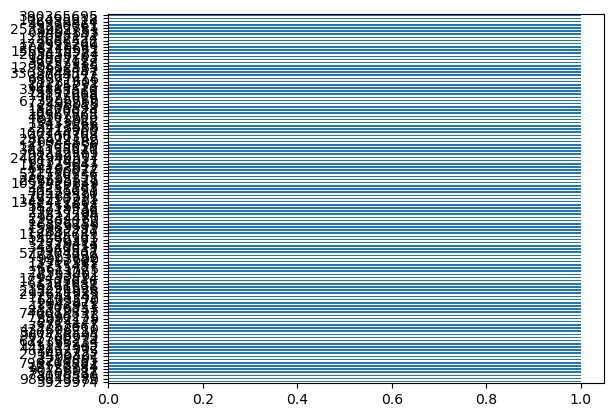

In [24]:
df['2019_Losses'].value_counts().plot(kind='barh')

<Axes: >

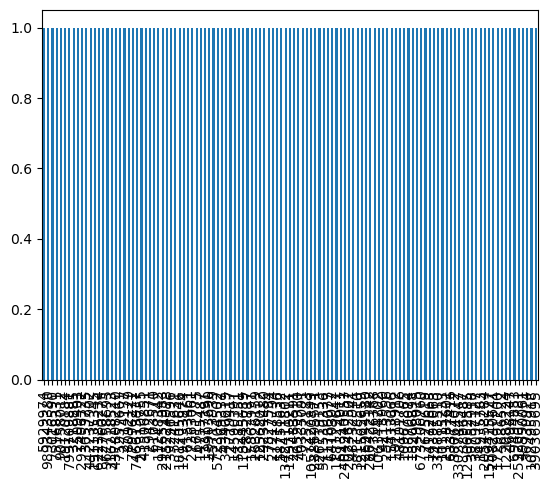

In [25]:
df['2019_Losses'].value_counts().plot(kind='bar')

<Axes: >

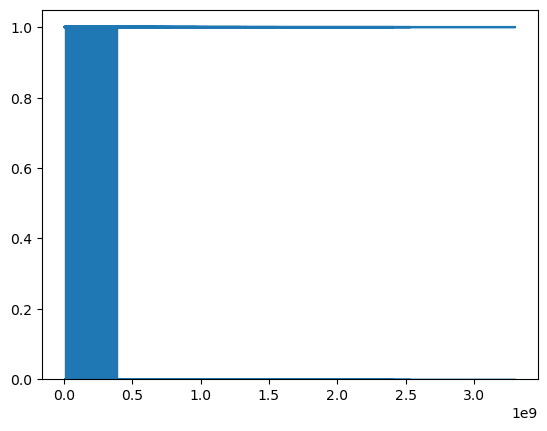

In [26]:
df['2019_Losses'].value_counts().plot(kind='area')

<Axes: >

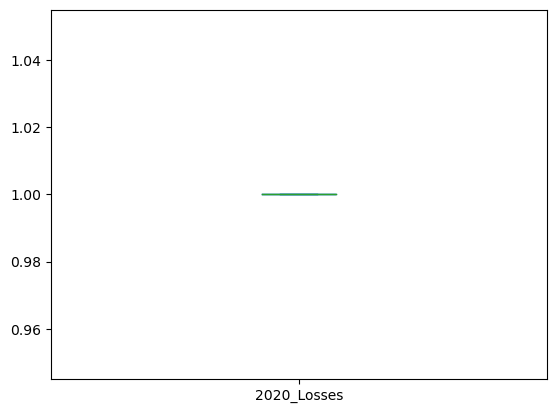

In [7]:
df['2020_Losses'].value_counts().plot(kind='box')

<Axes: ylabel='Frequency'>

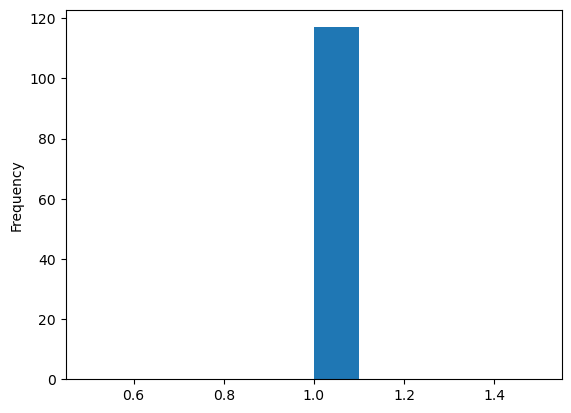

In [27]:
df['2019_Losses'].value_counts().plot(kind='hist')

<Axes: >

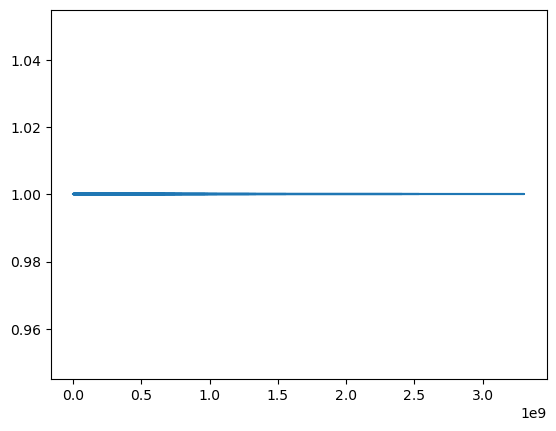

In [28]:
df['2019_Losses'].value_counts().plot(kind='line')

<Axes: ylabel='2019_Losses'>

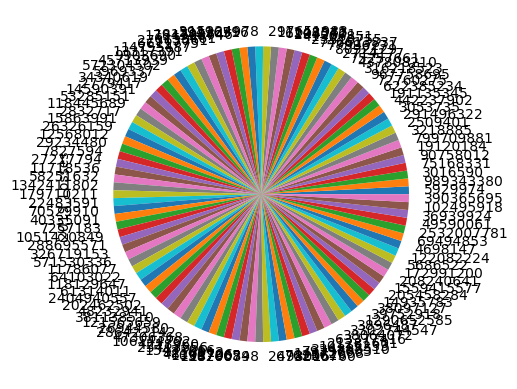

In [ ]:
df['2019_Losses'].value_counts().plot(kind='pie')

<Axes: >

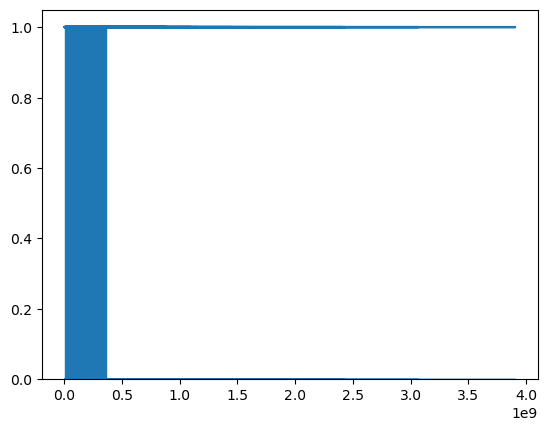

In [19]:
df['2020_Losses'].value_counts().plot(kind='area')

<Axes: >

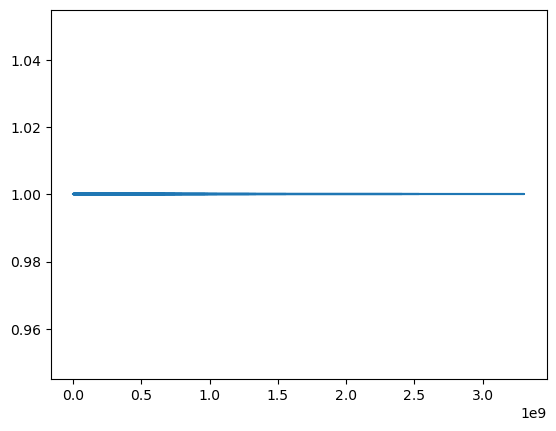

In [ ]:
df['2019_Losses'].value_counts().plot(kind='line')


## Data Save

In [36]:
df.to_excel('data.xlsx', index=False)
print("Data saved to 'data.xlsx'")

Data saved to 'data.xlsx'
